In [169]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [170]:
# Load the image data and preprocess it

image_path = 'D:\group_proj\dataset\C3'
mask_path = 'D:\group_proj\dataset\C3_mask'

# Get the image and mask names

images_ = os.listdir(image_path)
mask_ = os.listdir(mask_path)
    

In [171]:
print(mask_)

['Image 1.png', 'Image 1.xcf', 'Image 10.png', 'Image 10.xcf', 'Image 100.png', 'Image 100.xcf', 'Image 101.png', 'Image 101.xcf', 'Image 102.png', 'Image 102.xcf', 'Image 108.png', 'Image 108.xcf', 'Image 109.png', 'Image 109.xcf', 'Image 11.png', 'Image 11.xcf', 'Image 118.png', 'Image 118.xcf', 'Image 119.png', 'Image 119.xcf', 'Image 121.png', 'Image 121.xcf', 'Image 13.png', 'Image 13.xcf', 'Image 131.png', 'Image 131.xcf', 'Image 132.png', 'Image 132.xcf', 'Image 134.png', 'Image 134.xcf', 'Image 136.png', 'Image 136.xcf', 'Image 140.png', 'Image 140.xcf', 'Image 147.png', 'Image 147.xcf', 'Image 149.png', 'Image 149.xcf', 'Image 150.png', 'Image 150.xcf', 'Image 152.png', 'Image 152.xcf', 'Image 154.png', 'Image 154.xcf', 'Image 20.png', 'Image 20.xcf', 'Image 3.png', 'Image 3.xcf', 'Image 30.png', 'Image 30.xcf', 'Image 31.png', 'Image 31.xcf', 'Image 34.png', 'Image 34.xcf', 'Image 35.png', 'Image 35.xcf', 'Image 40.png', 'Image 40.xcf', 'Image 41.png', 'Image 41.xcf', 'Image 

In [172]:
len(images_)

55

In [173]:
len(mask_)

110

In [174]:
# taking the mask image only which ends with .png
masks_ = []
for i in range(len(mask_)):
    if mask_[i].endswith('.png'):
        masks_.append(mask_[i])
    else:
        pass

In [175]:
print(masks_)

['Image 1.png', 'Image 10.png', 'Image 100.png', 'Image 101.png', 'Image 102.png', 'Image 108.png', 'Image 109.png', 'Image 11.png', 'Image 118.png', 'Image 119.png', 'Image 121.png', 'Image 13.png', 'Image 131.png', 'Image 132.png', 'Image 134.png', 'Image 136.png', 'Image 140.png', 'Image 147.png', 'Image 149.png', 'Image 150.png', 'Image 152.png', 'Image 154.png', 'Image 20.png', 'Image 3.png', 'Image 30.png', 'Image 31.png', 'Image 34.png', 'Image 35.png', 'Image 40.png', 'Image 41.png', 'Image 43.png', 'Image 45.png', 'Image 47.png', 'Image 5.png', 'Image 53.png', 'Image 58.png', 'Image 60.png', 'Image 61.png', 'Image 64.png', 'Image 65.png', 'Image 66.png', 'Image 67.png', 'Image 68.png', 'Image 69.png', 'Image 76.png', 'Image 77.png', 'Image 78.png', 'Image 86.png', 'Image 89.png', 'Image 90.png', 'Image 92.png', 'Image 95.png', 'Image 96.png', 'Image 97.png', 'Image 98.png']


In [176]:
len(masks_)

55

In [177]:
import cv2

In [178]:
# read the image and resize it

i = len(images_)
for i in range(i):
    img = cv2.imread(os.path.join(image_path, images_[i]))
    img = cv2.resize(img, (224, 224))
    cv2.imwrite(os.path.join(image_path, images_[i]), img)
    


In [179]:
for m in range(len(masks_)):
    mask = cv2.imread(os.path.join(mask_path, masks_[m]))
    mask = cv2.resize(mask, (224, 224))
    cv2.imwrite(os.path.join(mask_path, masks_[m]), mask)

In [180]:
# shape of the image and mask

im = cv2.imread(os.path.join(image_path, images_[0])).shape
mg= cv2.imread(os.path.join(mask_path, mask_[0])).shape

print(im, mg)

(224, 224, 3) (224, 224, 3)


In [181]:
# (224, 224, 3) (224, 224, 3)
# the shape of the image and mask is same
# so we can append the image and mask in a list
# and then convert it into numpy array


# append the image and mask in a list

image = []
mask = []

# for i, m in range(len((images_))), range(len(mask_)):
#     img = cv2.imread(os.path.join(image_path, images_[i]))
#     msk = cv2.imread(os.path.join(mask_path, mask_[m]))
#     image.append(img)
#     mask.append(msk)

for i in range(len(images_)):
    img = cv2.imread(os.path.join(image_path, images_[i]))
    image.append(img)
    
for m in range(len(masks_)):
    msk = cv2.imread(os.path.join(mask_path, masks_[m]), 0)
    mask.append(msk)
    



In [182]:
print(len(image), len(mask))

55 55


In [183]:
print(image[54].shape, mask[54].shape)

(224, 224, 3) (224, 224)


In [184]:
# convert the list into numpy array

image = np.array(image, dtype = np.float32)
mask = np.array(mask, dtype = np.float32)

In [185]:
print(mask.shape, image.shape)

(55, 224, 224) (55, 224, 224, 3)


In [186]:
# normalize the image and mask
# image = image/255
# mask = mask/255

image = image/255
mask = mask/255


In [187]:
print(image[0].shape, mask[0].shape)

(224, 224, 3) (224, 224)


The random image and it's mask is 29


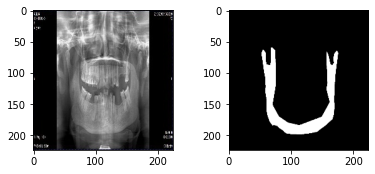

In [188]:
# random image and it's mask

import random
r = random.randint(0, len(image)-1)
print(f"The random image and it's mask is {r}")

fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4)
ax = fig.add_subplot(1, 2, 1)
ax.imshow(image[r])
ax = fig.add_subplot(1, 2, 2)
ax.imshow(mask[r], cmap="gray")

In [189]:
# define the model

from tensorflow.keras.layers import Conv2D, MaxPooling2D, Conv2DTranspose, Input
from tensorflow.keras.layers import Activation, BatchNormalization, Concatenate, Resizing, MaxPool2D, UpSampling2D, Concatenate
from tensorflow.keras.models import Model

In [190]:
def down_block(x, filters, kernel_size=(3, 3), padding="same", strides=1):
    c = Conv2D(filters, kernel_size, padding=padding, strides=strides, activation="relu")(x)
    c = Conv2D(filters, kernel_size, padding=padding, strides=strides, activation="relu")(c)
    p = MaxPool2D((2, 2), (2, 2))(c)
    return c, p

def up_block(x, skip, filters, kernel_size=(3, 3), padding="same", strides=1):
    us = UpSampling2D((2, 2))(x)
    concat = Concatenate()([us, skip])
    c = Conv2D(filters, kernel_size, padding=padding, strides=strides, activation="relu")(concat)
    c = Conv2D(filters, kernel_size, padding=padding, strides=strides, activation="relu")(c)
    return c

def bottleneck(x, filters, kernel_size=(3, 3), padding="same", strides=1):
    c = Conv2D(filters, kernel_size, padding=padding, strides=strides, activation="relu")(x)
    c = Conv2D(filters, kernel_size, padding=padding, strides=strides, activation="relu")(c)
    return c

In [191]:
def UNet():
    f = [16, 32, 64, 128, 256]
    inputs = Input((224, 224, 3))
    
    p0 = inputs
    c1, p1 = down_block(p0, f[0]) # 224 -> 112
    c2, p2 = down_block(p1, f[1]) # 112 -> 56
    c3, p3 = down_block(p2, f[2]) # 56 -> 28
    c4, p4 = down_block(p3, f[3]) # 28 -> 14
    
    bn = bottleneck(p4, f[4])
    
    u1 = up_block(bn, c4, f[3]) # 14 -> 28
    u2 = up_block(u1, c3, f[2]) # 28 -> 56
    u3 = up_block(u2, c2, f[1]) # 56 -> 112
    u4 = up_block(u3, c1, f[0]) # 112 -> 224
    
    outputs = Conv2D(1, (1, 1), padding="same", activation="sigmoid")(u4)
    model = Model(inputs, outputs)
    return model

In [192]:
model = UNet()
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["acc"])
model.summary()

Model: "model_6"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_114 (Conv2D)            (None, 224, 224, 16  448         ['input_7[0][0]']                
                                )                                                                 
                                                                                                  
 conv2d_115 (Conv2D)            (None, 224, 224, 16  2320        ['conv2d_114[0][0]']             
                                )                                                           

In [193]:
# train test validation split
# 80% train, 10% test, 10% validation

x_train = image[:int(0.8*len(image))]
Y_train = mask[:int(0.8*len(mask))]
x_val = image[int(0.8*len(image)):int(0.9*len(image))]
Y_val = mask[int(0.8*len(mask)):int(0.9*len(mask))]
x_test = image[int(0.9*len(image)):]
Y_test = mask[int(0.9*len(mask)):]

In [194]:
# train the model
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor="val_loss", patience=5, verbose=1, mode="min")

history = model.fit(x_train, Y_train, batch_size=16, epochs=50, callbacks=[early_stopping], validation_data=(x_val, Y_val))

Epoch 1/50
3/3 [==============================] - 3s 433ms/step - loss: 0.6384 - acc: 0.8209 - val_loss: 0.9610 - val_acc: 0.8183
Epoch 2/50
3/3 [==============================] - 1s 177ms/step - loss: 0.5994 - acc: 0.8523 - val_loss: 0.5561 - val_acc: 0.8183
Epoch 3/50
3/3 [==============================] - 1s 208ms/step - loss: 0.5489 - acc: 0.8523 - val_loss: 0.4991 - val_acc: 0.8183
Epoch 4/50
3/3 [==============================] - 1s 178ms/step - loss: 0.4999 - acc: 0.8523 - val_loss: 0.4962 - val_acc: 0.8183
Epoch 5/50
3/3 [==============================] - 1s 184ms/step - loss: 0.4908 - acc: 0.8523 - val_loss: 0.4836 - val_acc: 0.8183
Epoch 6/50
3/3 [==============================] - 1s 190ms/step - loss: 0.4401 - acc: 0.8523 - val_loss: 0.4627 - val_acc: 0.8183
Epoch 7/50
3/3 [==============================] - 1s 184ms/step - loss: 0.4042 - acc: 0.8523 - val_loss: 0.4579 - val_acc: 0.8183
Epoch 8/50
3/3 [==============================] - 1s 183ms/step - loss: 0.3849 - acc: 0.85

In [195]:
# save the model

model.save("model.h5")

In [196]:
# load the save model

import tensorflow as tf

model = tf.keras.models.load_model("model.h5")

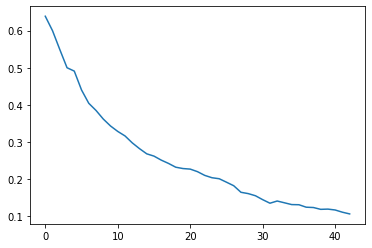

In [197]:
# plot the training and validation loss

plt.plot(history.history["loss"], label="train_loss")

In [198]:
# predict the mask for test image

result = model.predict(x_test)


1/1 [==============================] - 1s 1s/step


In [199]:
result = result > 0.5

In [200]:
len(x_test)

6

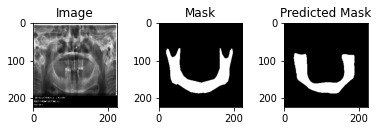

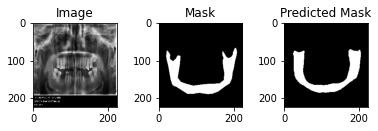

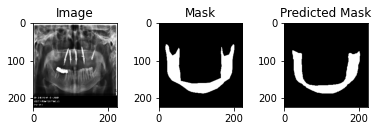

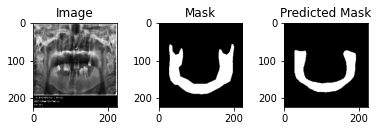

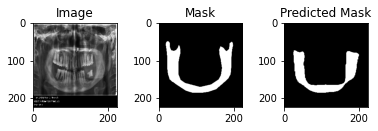

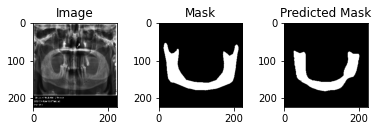

In [201]:
# plot the result and mask.

for i in range(len(x_test)):
    fig = plt.figure()
    fig.subplots_adjust(hspace=0.5, wspace=0.5)
    ax = fig.add_subplot(1, 3, 1)
    ax.imshow(x_test[i], cmap="gray")
    ax.title.set_text("Image")
    ax = fig.add_subplot(1, 3, 2)
    ax.imshow(Y_test[i], cmap="gray")
    ax.title.set_text("Mask")
    ax = fig.add_subplot(1, 3, 3)
    ax.imshow(result[i], cmap="gray")
    ax.title.set_text("Predicted Mask")
# fig = plt.figure()
# fig.subplots_adjust(hspace=0.4, wspace=0.4)
# ax = fig.add_subplot(1, 3, 1)
# ax.imshow(x_test[i], cmap="gray")
# ax = fig.add_subplot(1, 3, 2)
# ax.imshow(Y_test[i], cmap="gray")
# ax = fig.add_subplot(1, 3, 3)
# ax.imshow(result[i], cmap="gray")